#Apple AirTag - Sentiment Analysis

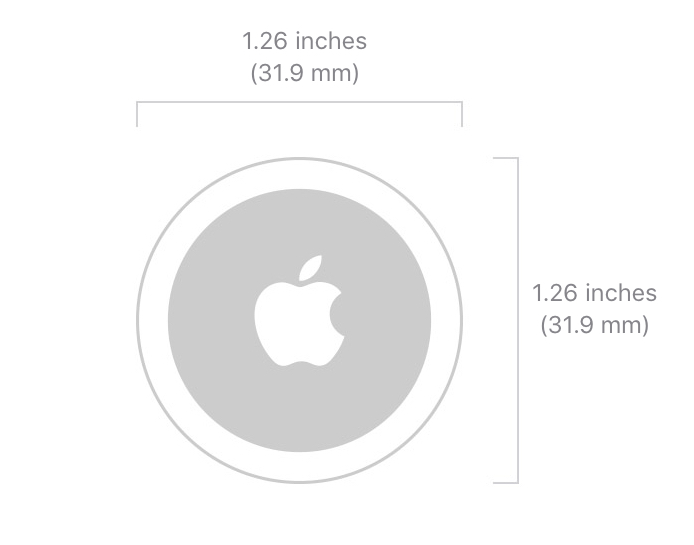

#What is senstiment Analysis?

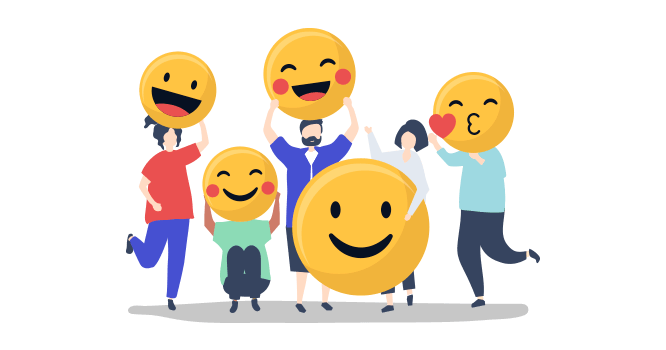

**What is Sentiment Analysis**

Sentiment Analysis, or Opinion Mining, is a sub-field of
Natural Language Processing (NLP) that tries to identify and
extract opinions within a given text

The aim of sentiment analysis is to gauge sentiments,
evaluations, attitudes and emotions of a speaker/writer
based on the computational treatment of subjectivity in a
text

**Why perform sentiment analysis?**

*   Manage critical posts on social media
*   Improve the Customer Experience
*   Assess the impact of sponsorships and CSR activities
*   Discover new market trends
*   Maintain the quality of the service on a national,international and global scale

**Why is so important?**

Sentiment Analysis enables companies to make sense out of
data. Thus they are able to elicit vital insights from a vast
unstructured dataset without having to manually indulge
with it

**Challenges**
* Understanding emotions through text are not always easy.
Sometimes even humans can get misled
* A text may contain multiple sentiments all at once
* Heavy use of emoticons and slangs with sentiment values in
social media texts like that of Twitter and Facebook also
makes text analysis difficult

* A sentence containing positive or negative words could be
neutral, that is not to express any opinion. In the questions
or in the conditional sentences:
– “Can you tell me which Sony camera is good?”
– “If I can find a good camera in the shop, I will buy it”
* The use of sarcasm is difficult to grasp:
– “What a great car! It stopped working in two days.”
* Some phrases do not have sentiment words but indicate
anyway an implicit opinion:
– “After two days of normal usage, the screen became black on the
bottom”

# The Pipeline
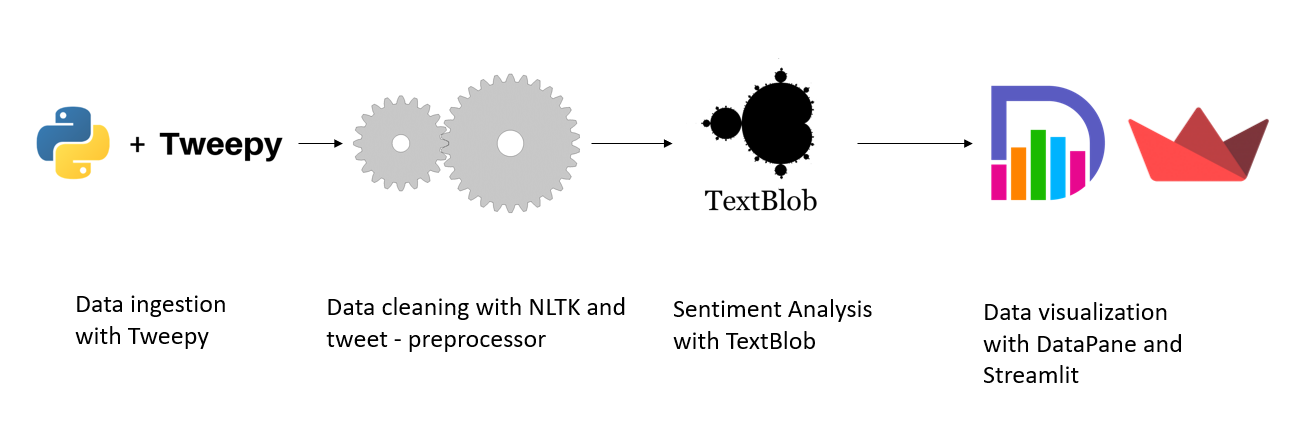

# Twitter scraping libraries

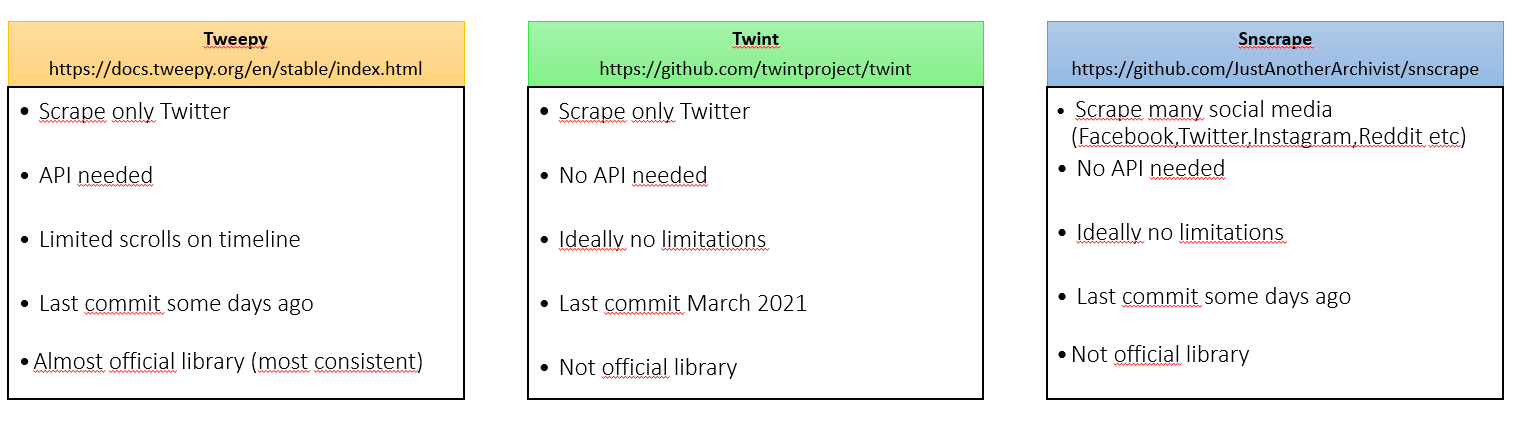

## Scraping with Tweepy



In order to get the data we use the library Tweepy, an easy-to-use Python library for accessing the Twitter API.

The Twitter API can be used to programmatically retrieve and analyze Twitter data, as well as build for the conversation on Twitter.
Over the years, the Twitter API has grown by adding additional levels of access for developers and academic researchers to be able to scale their access to enhance and research the public conversation. 


---



**Get your API:**

*  Sign up for a developer account
*  Next you will create a Project and an associated developer App during the onboarding process, which will provide you a set of credentials that you will use to authenticate all requests to the API.
*   Once you have access and have created a Project and App, you will be able to find or generate the following credentials within your developer App:


  1.   API Key and Secret: Essentially the username and password for your App. You will use these to authenticate requests that require OAuth 1.0a User Context
  2.   A set of user Access Tokens: In general, Access Tokens represent the user that you are making the request on behalf of. The ones that you can generate via the developer portal represent the user that owns the App.

  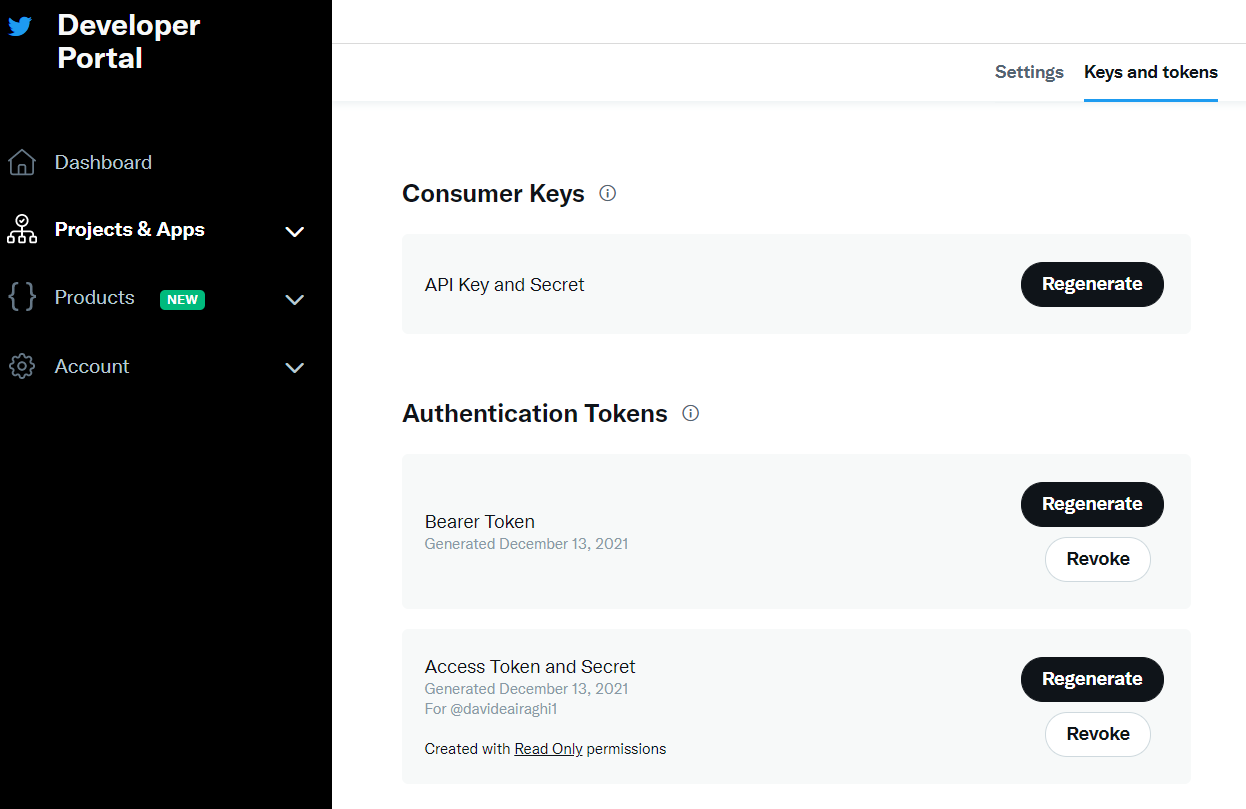

#### Install the packages

In [1]:
!pip install tweepy -U -q
!pip install python-dotenv -U -q

     |████████████████████████████████| 65 kB 2.3 MB/s 


In [2]:
import tweepy
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytz
import time
import warnings
import datetime
from datetime import date
from tweepy import OAuthHandler
from dotenv import load_dotenv

In [3]:
# getting automatic reloading and inline plotting for the entire notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext google.colab.data_table

Load enviroments variables to not expose secret credentials

In [4]:
load_dotenv('/content/vars.env')

True

In [5]:
# twitter API credentials
consumer_key_var = os.getenv('CONSUMER_KEY')
consumer_secret_var = os.getenv('CONSUMER_SECRET')
access_token_var = os.getenv('ACCESS_TOKEN')
access_secret_var = os.getenv('ACCESS_SECRET')
# datapane token
data_pane_token = os.getenv('DATA_PANE_TOKEN')
# azure cognitive services credentials
key = os.getenv('CG_KEY')
endpoint = os.getenv('CG_ENDPOINT')

In [6]:
consumer_key = consumer_key_var
consumer_secret = consumer_secret_var
access_token = access_token_var
access_secret = access_secret_var
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

### Setting the cursor to scrape the tweets


*   q = you can set the parameters of the search using keywords,sentences or hashtags and filter out something that you don't consider useful (e.g retweets) 
*   tweet_mode: full text of the twitter, no truncation
*   lang: you can choose a language of the tweets
*   return a json



In [7]:
searched_tweets = []

tweets_list = tweepy.Cursor(api.search_tweets, q="airtag -filter:retweets",tweet_mode='extended', lang='en').items()

for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'tweet' : text, 'favourite_count' : int(favourite_count), 'retweet_count' : int(retweet_count), 'created_at' : created_at}
    searched_tweets.append(line)

@AdreanaInLB @lenubienne @Apple How can they catch package thieves? If you can put the AirTag on the package, why wouldn’t you just put the package in your home?
Apple didn’t think that airtag shit through, at all
I would literally take that AirTag and put it on the collar of a dog. Or on a delivery truck
Airtag wallet
blueform Stylus Pen for iPad
USA https://t.co/zx8LcDtSbj
Who didn't see this coming?

"Another Driver Finds An Apple AirTag Tracking His Location" https://t.co/bkJNI5agWT
@tcarolinaac Airtag is pretty clutch
https://t.co/OruCcPxQlM Apple AirTag

"In Search of Great Products." #AmazonAffiliate #Paidlink15
@gedeon Something like “We’re moving and this AirTag that is not ours is still in range, that’s weird, notify user they may be being tracked”
@gedeon Pretty sure Tile works the same way. If an AirTag (or Tile) is not locatable by a network of devices then the value of either is severely limited. In this particular case, an unfamiliar AirTag following your iPhone should b

In [8]:
#df = pd.DataFrame(searched_tweets)
df = pd.read_csv('/content/Tweet-Apple AirTag.csv',index_col=0)
#create a copy
df_raw = df.copy()
df.head()

,tweet,favourite_count,retweet_count,created_at
0,"@Apple hi Apple, can you integrate #airtag te...",0.0,0,2021-05-17 05:47:00
1,Why the FUCK do I have to put an airtag on my ...,0.0,0,2021-05-17 05:36:28
2,@SnazzyQ But what if the AirTag is on your App...,0.0,0,2021-05-17 05:32:54
3,Video coming soon! #AirTag https://t.co/M7YxOA...,0.0,0,2021-05-17 05:32:28
4,Giving ur gf a airtag necklace @Apple,0.0,0,2021-05-17 05:32:26


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4644 entries, 0 to 4642
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet            4644 non-null   object 
 1   favourite_count  4643 non-null   float64
 2   retweet_count    4643 non-null   object 
 3   created_at       4642 non-null   object 
dtypes: float64(1), object(3)
memory usage: 181.4+ KB


#Text preprocessing

In [10]:
!pip install tweet-preprocessor -q
!pip install nltk -q

In [11]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from wordcloud import WordCloud
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import preprocessor as p
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

All fresh data should be processed before the consumption: text data is not an exception.

Especially tweets could be messy with 
- hashtags
- emoticons 
- links
- mentions of other users
- slang

In order to achieve a reasonable level of data quality the following task are perfomed:


1.   Clean raw tweets with **tweet-preprocessor** library

In [12]:
tweet = '@MyFriend, The accessories of the Airtag are getting expensive !!! #AirTag https://t.co/M7YxOAdJzt 🙂'
cleaned_tweet = p.clean(tweet)
print(cleaned_tweet)

, The accessories of the Airtag are getting expensive !!!


2. Tokenization is the splitting of a sentence into words. The sentence “This is an example.” can be tokenized like [“This”, “is”, “an”, “example”, “.”]

In [13]:
cleaned_tweet_token = tokens = nltk.word_tokenize(cleaned_tweet.lower())
print(cleaned_tweet_token)

[',', 'the', 'accessories', 'of', 'the', 'airtag', 'are', 'getting', 'expensive', '!', '!', '!']


3. Remove punctuation marks

In [15]:
cleaned_tweet_token_no_punct = [w for w in cleaned_tweet_token if w.isalpha()]
print(cleaned_tweet_token_no_punct)

['the', 'accessories', 'of', 'the', 'airtag', 'are', 'getting', 'expensive']


4.   Stopwords are the words that are commonly used and they don’t contribute to the meaning of a sentence such as “a”, “an”, “the”, “on”, “in” and so forth

In [18]:
stop_w = stopwords.words('english')
a = set(stop_w)
cleaned_tweet_token_no_punct_no_stop = [w for w in cleaned_tweet_token_no_punct if not w in a]
print(clened_tweet_token_no_punct_no_stop)

['accessories', 'airtag', 'getting', 'expensive']


5.  Lemmatization is the process of reducing a word to its root form. This root form called a lemma.

  In order to correctly transform the word to its proper root form we need to recognize the category of the word belongs to:
    - Noun
    - Verb
    - Adjective
    - Adverbs
  
  Part of speech tagging is in charge to perform this categorization. It associates a label to the word.

  Some example of lemmatization:

    - wolves --> wolf
    - swimming --> swim
    - ran --> run
    - bigger --> big




In [19]:
lemmatizer = WordNetLemmatizer()
#detect type of words (adverb,noun,)
for w in cleaned_tweet_token_no_punct_no_stop:

    part_of_speech_tag = pos_tag([w])
    
    if part_of_speech_tag[0][1].startswith('J'):
        ps = wordnet.ADJ
    elif part_of_speech_tag[0][1].startswith('V'):
        ps = wordnet.VERB
    elif part_of_speech_tag[0][1].startswith('N'):
        ps = wordnet.NOUN
    elif part_of_speech_tag[0][1].startswith('R'):
        ps =  wordnet.ADV
    else:
       None

    if ps is None:
      lm_word = lemmatizer.lemmatize(w)
    else:
      lm_word = lemmatizer.lemmatize(w,pos=ps)

    print('word: ' + w + ' - part of speech detected: ' +  part_of_speech_tag[0][1] + ' - lemmatized word: ' + lm_word)
    print('-------------------------------------------------------------------------------------------------')

word: accessories - part of speech detected: NNS - lemmatized word: accessory
-------------------------------------------------------------------------------------------------
word: airtag - part of speech detected: NN - lemmatized word: airtag
-------------------------------------------------------------------------------------------------
word: getting - part of speech detected: VBG - lemmatized word: get
-------------------------------------------------------------------------------------------------
word: expensive - part of speech detected: JJ - lemmatized word: expensive
-------------------------------------------------------------------------------------------------


Most common tag:

- VBD verb, past tense took
- VBG verb, gerund/present participle taking
- VBN verb, past participle taken
- VBP verb, sing. present, non-3d take
- VBZ verb, 3rd person sing. present takes
---
- JJ adjective ‘big’
- JJR adjective, comparative ‘bigger’
- JJS adjective, superlative ‘biggest’
---
- NN noun, singular ‘desk’
- NNS noun plural ‘desks’
- NNP proper noun, singular ‘Harrison’
- NNPS proper noun, plural ‘Americans’

In [20]:
def clean_tweet(row):
  tweet = row['tweet']
  tweet_cleaned = ''
  try:
     tweet_cleaned = p.clean(tweet)
  except:
    print(tweet)
  return tweet_cleaned
#------------------------------------------------------------------------------
def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
#------------------------------------------------------------------------------
def lemmatize_words(word_to_lemmatize):
  lemmatizer = WordNetLemmatizer()
  #detect type of words (adverb,noun,)
  part_of_speech_tag = pos_tag([word_to_lemmatize])
  pos_to_lemmatize = nltk_pos_tagger(part_of_speech_tag[0][1])
  if pos_to_lemmatize is None:
    lm_word = lemmatizer.lemmatize(word_to_lemmatize)
  else:
    lm_word = lemmatizer.lemmatize(word_to_lemmatize,pos=pos_to_lemmatize)
  return lm_word
#------------------------------------------------------------------------------
def process_text(row):
    twt = row['tweet_cleaned']
    stop_w = stopwords.words('english')
    a = set(stop_w)
    tokens = nltk.word_tokenize(twt.lower())
    token_words = [w for w in tokens if w.isalpha()]
    stop_words = [w for w in token_words if not w in a]
    meaningful_words = [lemmatize_words(word) for word in stop_words]
    return meaningful_words 

### Text cleaning

In [21]:
df['tweet_cleaned'] = df.apply(clean_tweet,axis=1)
df['tweet_preprocessed'] = df.apply(process_text,axis=1)
df.head()

,tweet,favourite_count,retweet_count,created_at,tweet_cleaned,tweet_preprocessed
0,"@Apple hi Apple, can you integrate #airtag te...",0.0,0,2021-05-17 05:47:00,"hi Apple, can you integrate technology in the ...","[hi, apple, integrate, technology, charge, cas..."
1,Why the FUCK do I have to put an airtag on my ...,0.0,0,2021-05-17 05:36:28,Why the FUCK do I have to put an airtag on my ...,"[fuck, put, airtag, airpods, omfg]"
2,@SnazzyQ But what if the AirTag is on your App...,0.0,0,2021-05-17 05:32:54,But what if the AirTag is on your Apple TV rem...,"[airtag, apple, tv, remote, hiding, inside, sofa]"
3,Video coming soon! #AirTag https://t.co/M7YxOA...,0.0,0,2021-05-17 05:32:28,Video coming soon!,"[video, come, soon]"
4,Giving ur gf a airtag necklace @Apple,0.0,0,2021-05-17 05:32:26,Giving ur gf a airtag necklace,"[give, ur, gf, airtag, necklace]"


In [22]:
# Save the result to csv
# We are saving the df result to csv because it's used into the streamlit dashboard
from google.colab import files

filename = "tweet_cleaned.csv"

#drop the original tweet text column
df_cleaned = df.drop(["tweet"], axis=1, inplace=False)

df_cleaned.to_csv(filename, index=False, sep="|", encoding="utf-8")

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### List of most 50 frequent words

In [23]:
words_list = []
for index,tr in df.iterrows():
  for x in list(tr['tweet_preprocessed']):
    words_list.append(x)

In [24]:
fdist = FreqDist(words_list)
ds_freq_words = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
ds_top_50_freq_words = ds_freq_words.sort_values(by=['Frequency'],ascending=False)[:50]
ds_top_50_freq_words_cln = ds_top_50_freq_words.loc[(ds_top_50_freq_words['Word'] != 'airtag')] #remove search key words
ds_top_50_freq_words_cln.sort_values(by=['Frequency'],ascending=False)

,Word,Frequency
1,apple,1972
44,hack,751
79,find,577
74,track,457
143,researcher,450
142,security,442
26,new,394
204,use,338
272,get,334
192,lose,320


In [25]:
frequency_word_plot = px.bar(ds_top_50_freq_words_cln, 
             x='Frequency',
             y='Word',
             orientation = 'h', 
             template = 'plotly_white',
             color = 'Frequency',
             range_color=[50, 600])
frequency_word_plot.show()

### WordCloud

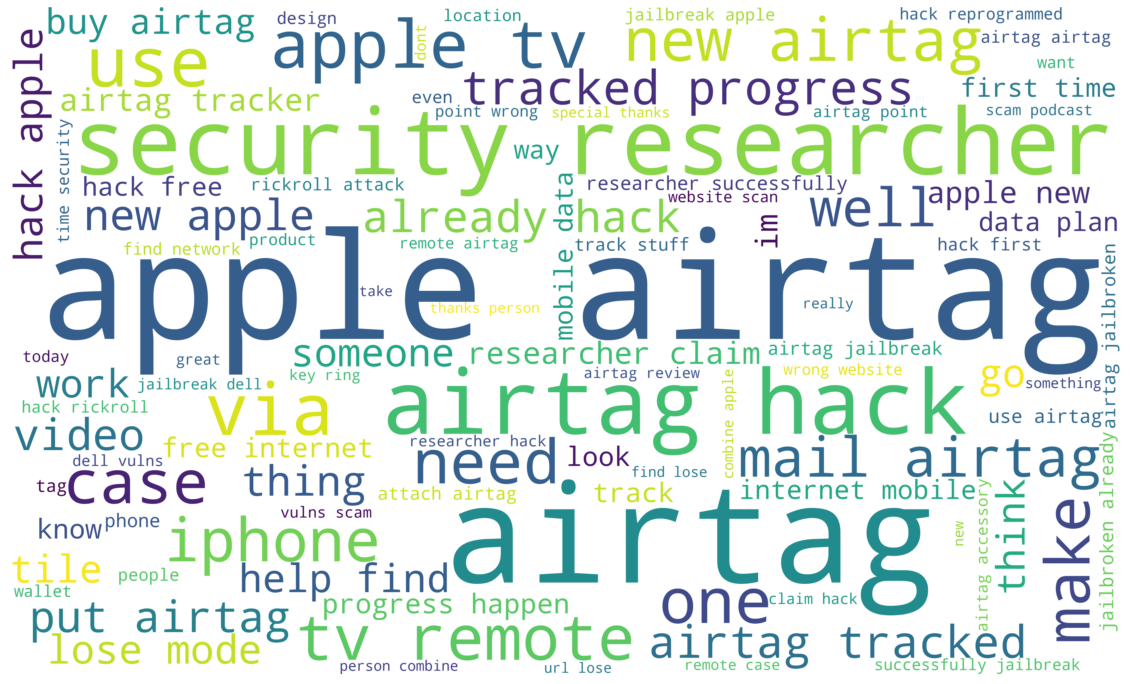

In [26]:
listToStr = ' '.join([str(elem) for elem in words_list])
wordcloud = WordCloud(width=5000, height=3000, max_words= 100,background_color ='white').generate(listToStr)
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [27]:
#save image
wordcloud.to_file("/content/wordcloud_airtag.jpeg")

# Sentiment Analysis

Sentiment analysis, also called opinion mining or emotion AI, is the process of determining whether a piece of writing is positive, negative, or neutral. A common use case for this technology is to discover how people feel about a particular topic. Sentiment analysis is widely applied to reviews and social media for a variety of applications.


There can be two approaches to sentiment analysis:
1. Lexicon-based methods
2. Machine Learning-based methods.

Lexicon based methods define a list of positive and negative words, with a valence — (eg ‘nice’: +2, ‘good’: +1, ‘terrible’: -1.5 etc). The algorithm looks up a text to find all known words. It then combines their individual results by summing or averaging. Some extensions can check some grammatical rules, like negation or sentiment modifier (like the word “but”, which weights sentiment values in text differently, to emphasize the end of text).


For lexicon-based approaches, a sentiment is defined by its semantic orientation and the intensity of each word in the sentence. This requires a pre-defined dictionary classifying negative and positive words. Generally, a text message will be represented by bag of words. After assigning individual scores to all the words, final sentiment is calculated by some pooling operation like taking an average of all the sentiments.
 
**There are several options available on the market (pays as you go or free):**





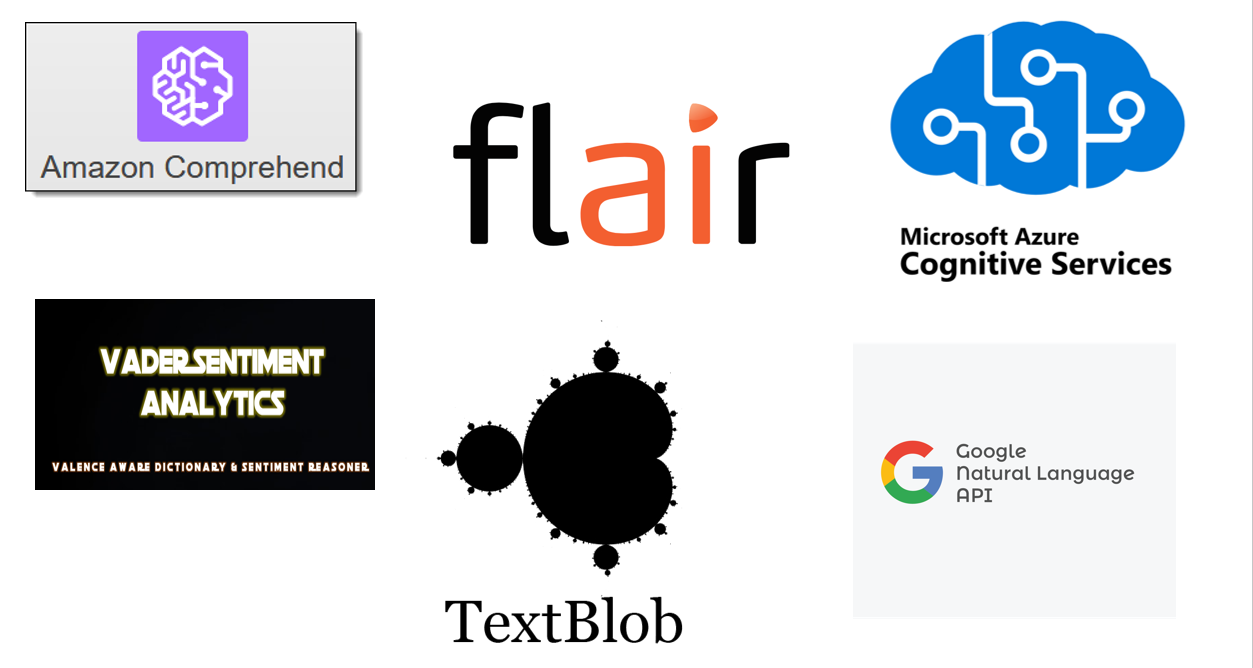

#Sentiment Analysis TextBlob vs Azure Cognitive Services

I pick two different alternatives to get a sentiment score:


*   Azure Cognitive Service: this is a pay as you go service provided by Microsoft Azure. The sentiment analysis feature provides sentiment labels (such as "negative", "neutral" and "positive") based on the highest confidence score found by the service at a sentence and document-level.
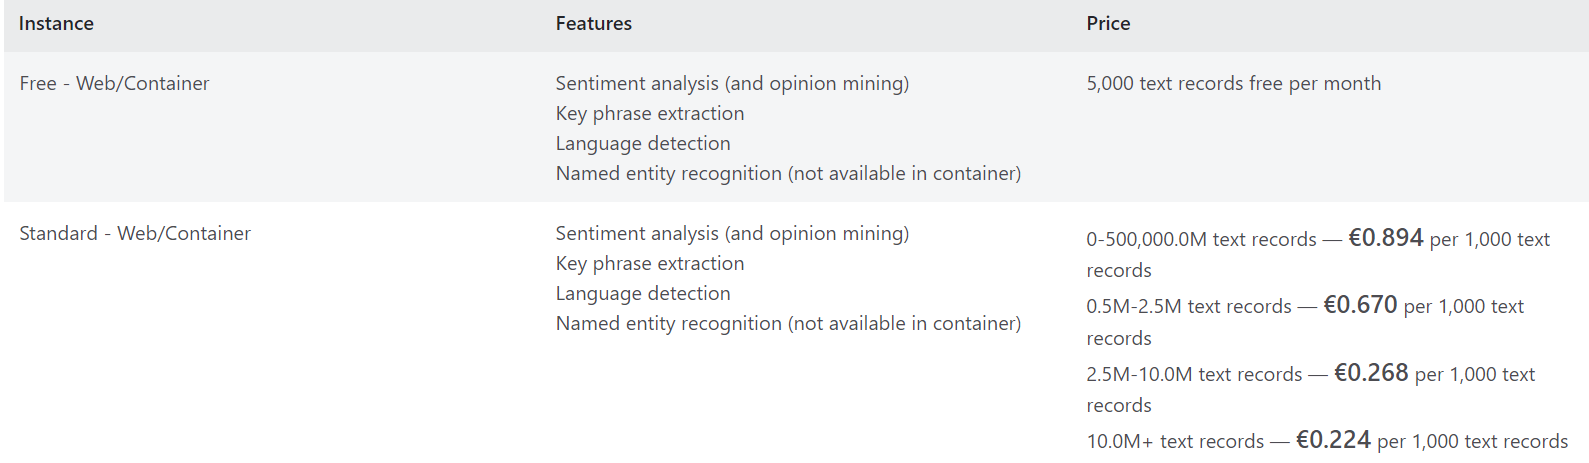
*   TextBlob: is a free library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

  **TextBlob returns polarity and subjectivity of a sentence:**
  *   Polarity lies between [-1,1]. 1 defines the most positive rank and -1 defines the higher values of negativity.
  *   Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.



In [28]:
!pip install azure-ai-textanalytics==5.1.0
!pip install --upgrade textblob -q

     |████████████████████████████████| 153 kB 5.2 MB/s 
     |████████████████████████████████| 178 kB 35.5 MB/s 
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 41 kB 577 kB/s 
     |████████████████████████████████| 636 kB 5.3 MB/s 


In [29]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
from textblob import TextBlob

In [30]:
# Authenticate the client using your key and endpoint 
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

In [31]:
sentence = ["Airtags are extremely useful,I love the design"]
print("Sentence to analyze: ",sentence[0])
print("--------------------------------------------------------------")
print("-------------------Azure Cognitive Service--------------------")
response = client.analyze_sentiment(documents=sentence)[0]
print("Sentence Sentiment: {}".format(response.sentiment))
print("Overall scores: Positive={0:.2f}; Neutral={1:.2f}; Negative={2:.2f} \n".format(
        response.confidence_scores.positive,
        response.confidence_scores.neutral,
        response.confidence_scores.negative,
    ))
print("--------------------------TextBlob----------------------------")
text = ''
score = TextBlob(sentence[0]).sentiment.polarity
if score < 0:
  sentiment = 'Negative'
elif score == 0:
  sentiment ='Neutral'
elif score > 0:
  sentiment = 'Positive'
print("Sentence Sentiment: {}".format(sentiment))
print("Scores: {0:.2f}".format(score))

Sentence to analyze:  Airtags are extremely useful,I love the design
--------------------------------------------------------------
-------------------Azure Cognitive Service--------------------
Sentence Sentiment: positive
Overall scores: Positive=1.00; Neutral=0.00; Negative=0.00 

--------------------------TextBlob----------------------------
Sentence Sentiment: Positive
Scores: 0.19


#Sentiment Analysis with TextBlob

### Install the packages

In [32]:
!pip install --upgrade textblob -q

In [33]:
import numpy as np
import seaborn as sb
from textblob import TextBlob

In [34]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
#-----------------------------------------------------------------------------------
# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
#-----------------------------------------------------------------------------------   
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getPolarityAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 elif score > 0:
  return 'Positive'
#-----------------------------------------------------------------------------------   
# Create a function 
def getSubjectivityAnalysis(score):
 if score < 0.50:
  return 'Objective'
 elif score == 0.50:
  return 'Neutral'
 elif score > 0.50:
  return 'Subjective'
#----------------------------------------------------------------------------------   
# Create a function to allocate the sentiment in a specific quadrant
def assignQuadrant(pol,subj):
    return pol + " and " + subj

### Get Polarity and Subjectivity with TextBlob

In [35]:
df.drop(['created_at', 'tweet_preprocessed'], axis=1, inplace=True)

In [36]:
df['subjectivity'] = df['tweet_cleaned'].apply(getSubjectivity)
df['polarity'] = df['tweet_cleaned'].apply(getPolarity)
df['polarity_analysis'] = df['polarity'].apply(getPolarityAnalysis)
df['subjectivity_analysis'] = df['subjectivity'].apply(getSubjectivityAnalysis)
df['type'] = np.vectorize(assignQuadrant)(df['polarity_analysis'], df['subjectivity_analysis'])
df.head()

,tweet,favourite_count,retweet_count,tweet_cleaned,subjectivity,polarity,polarity_analysis,subjectivity_analysis,type
0,"@Apple hi Apple, can you integrate #airtag te...",0.0,0,"hi Apple, can you integrate technology in the ...",0.0,0.0,Neutral,Objective,Neutral and Objective
1,Why the FUCK do I have to put an airtag on my ...,0.0,0,Why the FUCK do I have to put an airtag on my ...,0.6,-0.4,Negative,Subjective,Negative and Subjective
2,@SnazzyQ But what if the AirTag is on your App...,0.0,0,But what if the AirTag is on your Apple TV rem...,0.2,-0.1,Negative,Objective,Negative and Objective
3,Video coming soon! #AirTag https://t.co/M7YxOA...,0.0,0,Video coming soon!,0.0,0.0,Neutral,Objective,Neutral and Objective
4,Giving ur gf a airtag necklace @Apple,0.0,0,Giving ur gf a airtag necklace,0.0,0.0,Neutral,Objective,Neutral and Objective


In [37]:
#save results
df.to_csv('Apple AirTag - sentiment analysis.csv')

#### Count of polarity results

In [38]:
frequency_pol = df.groupby(['polarity_analysis']).size().reset_index(name='cnt')
frequency_pol.head()

,polarity_analysis,cnt
0,Negative,619
1,Neutral,1965
2,Positive,2060


#### Count of subjectivity results

In [39]:
frequency_sub = df.groupby(['subjectivity_analysis']).size().reset_index(name='cnt')
frequency_sub.head()

,subjectivity_analysis,cnt
0,Neutral,193
1,Objective,3087
2,Subjective,1364


#### Donuts

In [40]:
donut_cnt = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
donut_cnt.add_trace(go.Pie(labels=frequency_pol.polarity_analysis, values=frequency_pol.cnt,marker_colors=px.colors.sequential.Plasma_r,textinfo='label+percent',title = 'Polarity'),1, 1)
donut_cnt.add_trace(go.Pie(labels=frequency_sub.subjectivity_analysis, values=frequency_sub.cnt,marker_colors=px.colors.sequential.Plasma,textinfo='label+percent',title = 'Subjectivity'),1, 2)

# Use `hole` to create a donut-like pie chart
donut_cnt.update_traces(hole=.5, hoverinfo="label+percent")

donut_cnt.update_layout(title_text = 'Size of sentiments results and subjectivity results')
donut_cnt.update_layout(showlegend=False)

donut_cnt.show()

#### Chart to perform quadrant analysis

In [41]:
df_quadrant = df.loc[(df['polarity_analysis'] != 'Neutral') & (df['subjectivity_analysis'] != 'Neutral')]

In [42]:
colorscales = px.colors.named_colorscales()
quadrant_scatter_plot = px.scatter(df_quadrant, 
                 x="polarity", 
                 y="subjectivity", 
                 color="type",
                 color_discrete_sequence=px.colors.sequential.Plasma_r,
                 hover_data=['tweet','favourite_count','retweet_count'],
                 template = 'plotly_white',
                 title="Quadrant chart focused on subjectivity and polarity (neutral excluded)")
quadrant_scatter_plot.show()

 #### Calculate BigNumber

In [43]:
cntPos = frequency_pol[frequency_pol["polarity_analysis"] == 'Positive']
cntNeutral = frequency_pol[frequency_pol["polarity_analysis"] == 'Neutral']
cntNegative = frequency_pol[frequency_pol["polarity_analysis"] == 'Negative']

Aggiungo immagine sned notification by email
e provo a inserire la schedulazione

# Create and publish the report with DataPane

Datapane is an API for people who analyze data in Python and need a way to share their results. It provides a way to create reports programmatically from components that wrap around the common objects in analyses, such as:
- Pandas DataFrames
- Plots from Python visualization libraries such as Plotly, Bokeh, Altair, and Folium
- Markdown

Once created, reports can be published on the web, dynamically generated in the cloud, or embedded into your own application, where data can be explored, and visualizations can be used interactively

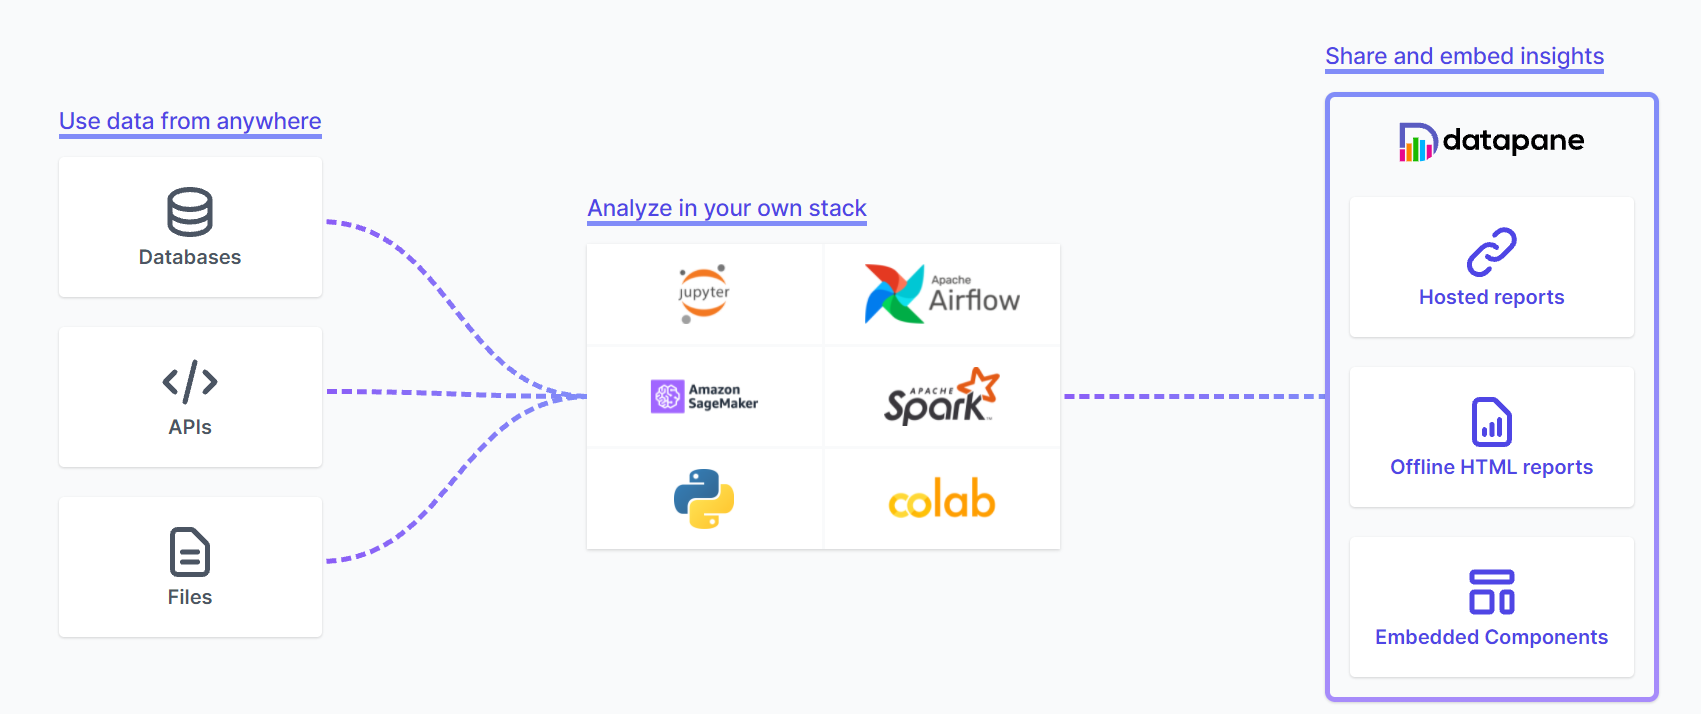

**Elements to build a report:**


*  **DataTable**: the DataTable block takes a pandas DataFrame and renders an interactive, sortable, searchable table in your report
*  **Table**:the Table component takes a pandas DataFrame and renders an HTML table in your report
*  **BigNumber**: a single number or change can often be the most important thing in a report.
*  **Plots**: plotting with your favourite library Bokeh,Altair,Plotly,Matplotlib / Seaborn,Folium.
*  **Text**: the best way to include long-form text is to use the Web Editor, which allows you to add and edit text directly in the browser, and preview the result.
*  **Media**: images,videos and other media.


**Sharing**

Datapane Studio provides a free platform for uploading reports, with the following options for report visibility:  
* **Default**: You have unlimited default reports, which allow anyone with the URL to access them, but they won't appear on your profile or in search results. This is not a truly private system, so make sure you aren't uploading very sensitive information.

* **Portfolio**: You can also choose to add the report to your public portfolio which you can share with potential employers/readers. This is a great way to gain an audience and receive feedback on your reports!

* **Private**: Your Community account comes with a limited number of private reports if you need to share data confidentially within your organization. Private reports are shared through the Report Notifications mechanism.


---


**Report notifications**

Datapane provides two ways to share your report:
* Instant sharing by email: go to your Report Settings -> Email Recipients and enter your recipient email addresses. When you click 'Send Email Now' recipients will receive an email with a screenshot of the report plus a link back to the hosted report

* Scheduled report notification by email: If you deploy your script or Jupyter Notebook as a Datapane app, you may want to run it on a schedule to automatically create reports for your team -- for instance, to pull down fresh data from your warehouse each day, or poll an internal API for changes. 


In [44]:
!pip3 install --upgrade -q datapane

     |████████████████████████████████| 2.6 MB 5.4 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 97 kB 6.1 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 10.1 MB 22.0 MB/s 
     |████████████████████████████████| 71 kB 7.2 MB/s 
     |████████████████████████████████| 193 kB 43.5 MB/s 
     |████████████████████████████████| 596 kB 35.3 MB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.9 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [45]:
import datapane as dp

[autoreload of jsonschema failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'draft6_format_checker' from 'jsonschema._format' (/usr/local/lib/python3.7/dist-packages/jsonschema/_format.py)
]
[autoreload of jsonschema.validators failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: module 'jsonschema._validators' has no attribute 'allOf'
]


In [ ]:
#login
dp.login(token=data_pane_token, server='https://datapane.com/')

In [ ]:
#build the report
r = dp.Report(
  dp.Text('Apple AirTag sentiment analysis'), #add description to the report
  dp.Select(blocks=[
        dp.DataTable(df_raw, label='Dataset'),
        dp.Table(df_raw.describe(), label='Data Description'),
    ]),
   dp.Group(
            dp.Media(file = '/content/wordcloud_airtag.jpeg'),    # add image
            dp.Plot(frequency_word_plot,responsive = True), 
   columns = 2
   ),
  dp.Group(
            dp.BigNumber(
                        heading="Number of Positive tweets",     # group of big numbers
                        value=int(cntPos.cnt)),
            dp.BigNumber(
                        heading="Number of Neutral tweets", 
                        value=int(cntNeutral.cnt)),
            dp.BigNumber(
                        heading="Number of Negative tweets", 
                        value= int(cntNegative.cnt)),                             
  columns = 3
  ),
  dp.Plot(donut_cnt,responsive= True),
  dp.Plot(quadrant_scatter_plot,responsive=True),     
)

In [ ]:
#publish or upload & open report in the browser
r.upload(name = 'Apple AirTag sentiment analysis',open=True,visibility = dp.Visibility.PORTFOLIO)

Uploading report and associated data - *please wait...*
Report successfully uploaded at https://datapane.com/u/airaghidavide/reports/O7vxBpA/apple-airtag-sentiment-analysis/, follow the link to view and share your report.
